In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Food Consumption.xlsx')
df.head()

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [3]:
df.columns

Index(['(A1) CITY', '(A2) PROVINCE', '(B3) GENDER', '(B4) AGE',
       '(B5) RELIGION', '(B6) ETHNIC', '(B7) EDUCATION LEVEL',
       '(B8) LIVED IN URBAN AREA (YEARS)', '(B9) OCCUPATION',
       '(B10) SOCIAL CLAS', '(B11) HOUSEHOLD MEMBER',
       '(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)',
       '(C13) TIME OF INCOME RECEIPT',
       '(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)',
       '(C15) % MONTHLY EXPENDITURE FOR FOOD', '(D16) HEALTH FACTOR',
       '(D17) PRICE FACTOR)', '(E18) RELIGIOUS VALUE IN TYPE OF FOOD',
       '(E19) RELIGIOUS VALUE IN EATING PLACES',
       '(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN',
       '(E21) CUSTOM VALUE IN TYPE OF FOOD',
       '(E22) CUSTOM VALUE IN EATING PLACES',
       '(E23) CUSTOM VALUE IN CONSUMPTION PATTERN',
       '(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES',
       '(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES',
       '(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RU

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

In [6]:
# drop last 3 columns

#df.drop
#df.columns = [re.sub("[\(\[].*?[\)\]]", '', col).strip().lower() for col in df.columns]
#df.columns = [re.sub('[^A-Za-z ]+', '', col) for col in df.columns]


In [79]:
# preprocess the column names using regex
# ignore all value that in first bracket() and replace space with empty string, ignore the brackets 

def preprocess_columns(df):
    for i in range(0, len(df.columns)):
        # if the column is the last two column then extract the value from the the fifth character to the end
        if i == len(df.columns) - 2:
            df.columns.values[i] = df.columns[i][5:].lower()
        else:
            elements = (("[\(\[].*?[\)\]]", ''), ('[^A-Za-z ]+', ''))
            for element in elements:
                df.columns.values[i] = re.sub(element[0], element[1], df.columns[i]).strip().lower()
    df.reset_index(inplace=True)
    return df.iloc[:, 1:]


In [80]:
test = preprocess_columns(df)
test.head()

,level,level,level,level,index,city,province,gender,age,religion,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,based on religious rules,practice of consuming traditional food
0,0,0,0,0,0,Jakarta,DKI Jakarta,Female,31,Islam,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,1,1,1,1,1,Jakarta,DKI Jakarta,Female,36,Islam,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,2,2,2,2,2,Jakarta,DKI Jakarta,Male,24,Islam,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,3,3,3,3,3,Jakarta,DKI Jakarta,Female,63,Islam,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,4,4,4,4,4,Jakarta,DKI Jakarta,Male,43,Protestant,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [60]:
test.dtypes

index                                                               int64
city                                                               object
province                                                           object
gender                                                             object
age                                                                 int64
religion                                                           object
ethnic                                                             object
education level                                                    object
lived in urban area                                                 int64
occupation                                                         object
social clas                                                        object
household member                                                    int64
household income                                                   object
time of income receipt                

In [61]:
# function to convert to string, extract 5 character, replace : with . , convert to float

def convert_to_float(df):
    for i in range(0, len(df.columns)):
        if i == 0:
            df.iloc[:, i] = df.iloc[:, i].astype(str).str[5:].str.replace(':', '.').astype(float)
        else:
            df.iloc[:, i] = df.iloc[:, i].astype(str).str.replace(':', '.').astype(float)
    return df

,index,age,lived in urban area,household member,monthly expenditure for food
count,710.000000,710.000000,710.000000,710.000000,710.000000
mean,354.500000,41.308451,28.645070,6.022535,42.992958
std,205.103632,11.948966,8.967781,0.673537,17.057811
min,0.000000,22.000000,6.000000,5.000000,18.000000
25%,177.250000,31.000000,23.000000,6.000000,26.000000
50%,354.500000,39.000000,29.000000,6.000000,41.000000
75%,531.750000,52.000000,34.000000,6.000000,58.000000
max,709.000000,65.000000,63.000000,8.000000,76.000000


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   city                                                             710 non-null    object
 1   province                                                         710 non-null    object
 2   gender                                                           710 non-null    object
 3   age                                                              710 non-null    int64 
 4   religion                                                         710 non-null    object
 5   ethnic                                                           710 non-null    object
 6   education level                                                  710 non-null    object
 7   lived in urban area                                  

In [45]:
# print uniqeu values in religious  prefix column
# print all columns that start with religiou

def print_unique_values(df):
    for col in df.columns:
        if col.startswith('relig'):
            print(col, df[col].unique())
            print('')


In [47]:
for col in test.columns:
    if col.startswith('relig'):
        print(col, test[col].unique())

religion ['Islam' 'Protestant' 'Catholic' 'Hindu' 'Budha' 'Other']
religious value in type of food ['Strongly Agree' 'Neither agree nor disagree' 'Agree' 'Disagree'
 'Strongly Disagree']
religious value in eating places ['Neither agree nor disagree' 'Agree' 'Strongly Agree' 'Disagree']
religious value in consumption pattern ['Agree' 'Neither agree nor disagree' 'Strongly Agree' 'Disagree']


In [48]:
# import label encoder

from sklearn.preprocessing import LabelEncoder

In [62]:
# apply to last 13 columns

def label_encoder(df):
    le = LabelEncoder()
    for col in df.columns[-13:]:
        df[col] = le.fit_transform(df[col])
        # print rules for each column
        print(col, le.classes_)
        print('')
    return df

In [63]:
test['health factor'].value_counts()

Neither agree nor disagree    313
Agree                         135
Strongly Agree                132
Disagree                      122
Strongly Disagree               8
Name: health factor, dtype: int64

In [71]:
# print unqiue value for last 13 columns

for col in test.columns[-13:]:
    print(col,':', test[col].unique())

health factor : ['Disagree' 'Neither agree nor disagree' 'Strongly Disagree' 'Agree'
 'Strongly Agree']
price factor : ['Agree' 'Strongly Agree' 'Disagree' 'Strongly Disagree'
 'Neither agree nor disagree']
religious value in type of food : ['Strongly Agree' 'Neither agree nor disagree' 'Agree' 'Disagree'
 'Strongly Disagree']
religious value in eating places : ['Neither agree nor disagree' 'Agree' 'Strongly Agree' 'Disagree']
religious value in consumption pattern : ['Agree' 'Neither agree nor disagree' 'Strongly Agree' 'Disagree']
custom value in type of food : ['Strongly Agree' 'Neither agree nor disagree' 'Agree' 'Disagree']
custom value in eating places : ['Neither agree nor disagree' 'Agree' 'Disagree' 'Strongly Agree']
custom value in consumption pattern : ['Neither agree nor disagree' 'Agree' 'Strongly Agree' 'Disagree']
practice of food consumption based on religious rules : ['Neither agree nor disagree' 'Disagree' 'Agree' 'Strongly Agree']
practice of food consumption based o

In [72]:
# define replace function for last 13 columns

def replace_values(df):
    # define a dictionary 
    replace_dict = {'Strongly Agree': 5, 'Agree': 4, 'Neither agree nor disagree': 3, 'Disagree': 2, 'Strongly Disagree': 1}
    for col in df.columns[-13:]:
        df[col] = df[col].map(replace_dict)
    return df



In [73]:
test2 = replace_values(test)
test2.head()

,index,city,province,gender,age,religion,ethnic,education level,lived in urban area,occupation,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,of dishes variation based on religious rules,practice of consuming traditional food
0,0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,...,3,4,5,3,3,3,2,3,4,4
1,1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,...,4,4,5,4,4,2,3,3,3,5
2,2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,...,4,3,3,2,4,2,3,3,3,3
3,3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,...,4,3,4,3,4,4,3,2,3,4
4,4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,...,5,3,3,3,5,5,4,2,4,4


In [74]:
test.head()

,index,city,province,gender,age,religion,ethnic,education level,lived in urban area,occupation,...,religious value in eating places,religious value in consumption pattern,custom value in type of food,custom value in eating places,custom value in consumption pattern,practice of food consumption based on religious rules,practice of food consumption based on custom rules,buying food product in the right place based on religious rules,of dishes variation based on religious rules,practice of consuming traditional food
0,0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,...,3,4,5,3,3,3,2,3,4,4
1,1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,...,4,4,5,4,4,2,3,3,3,5
2,2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,...,4,3,3,2,4,2,3,3,3,3
3,3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,...,4,3,4,3,4,4,3,2,3,4
4,4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,...,5,3,3,3,5,5,4,2,4,4


In [82]:
# count missing values

#test2 = label_encoder(test)
#test2.head()

In [32]:
# print column with numeric values

numerical = test.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['age',
 'lived in urban area',
 'household member',
 'monthly expenditure for food']

In [81]:
numerical.append('index')

In [36]:
import warnings
warnings.filterwarnings('ignore')

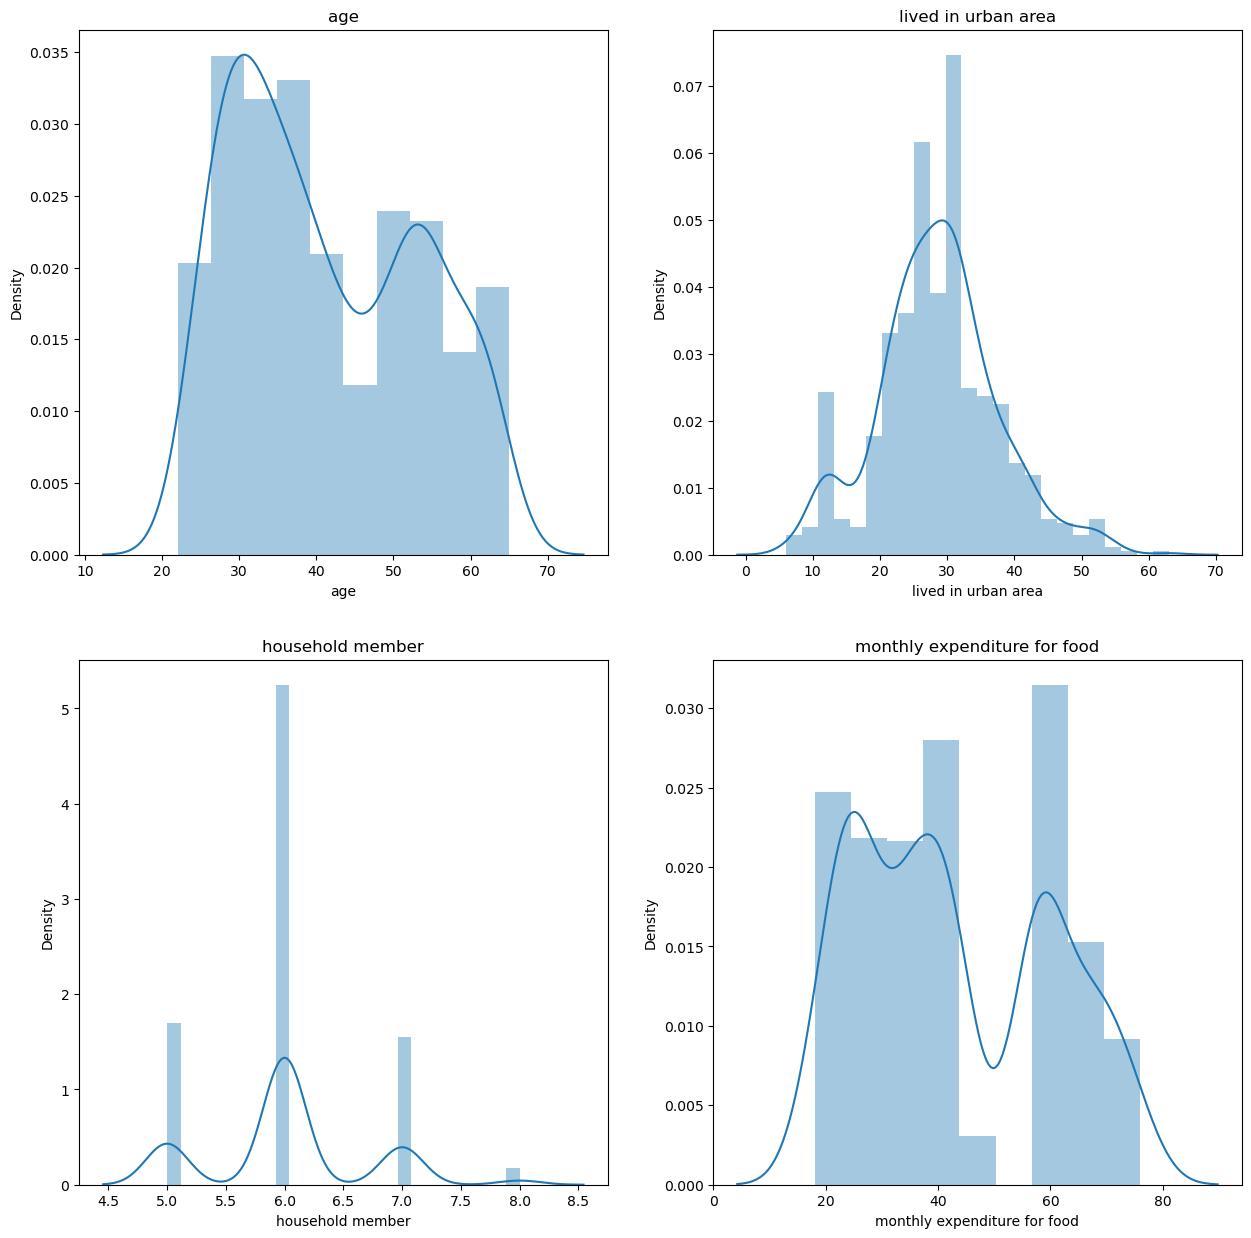

In [37]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)):
    plt.subplot(2,3,i+1)
    sns.distplot(test2[numerical[i]], kde=False)
    plt.title(numerical[i])
plt.tight_layout()


In [40]:
# Check distribution on numeric columns with displot for numerical columns
# make subplots for each column

def plot_distribution(df, cols, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, col in enumerate(cols):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.distplot(df[col], ax=ax, kde=True, hist=True)
        ax.set_title(col)
    fig.tight_layout()
    plt.show()

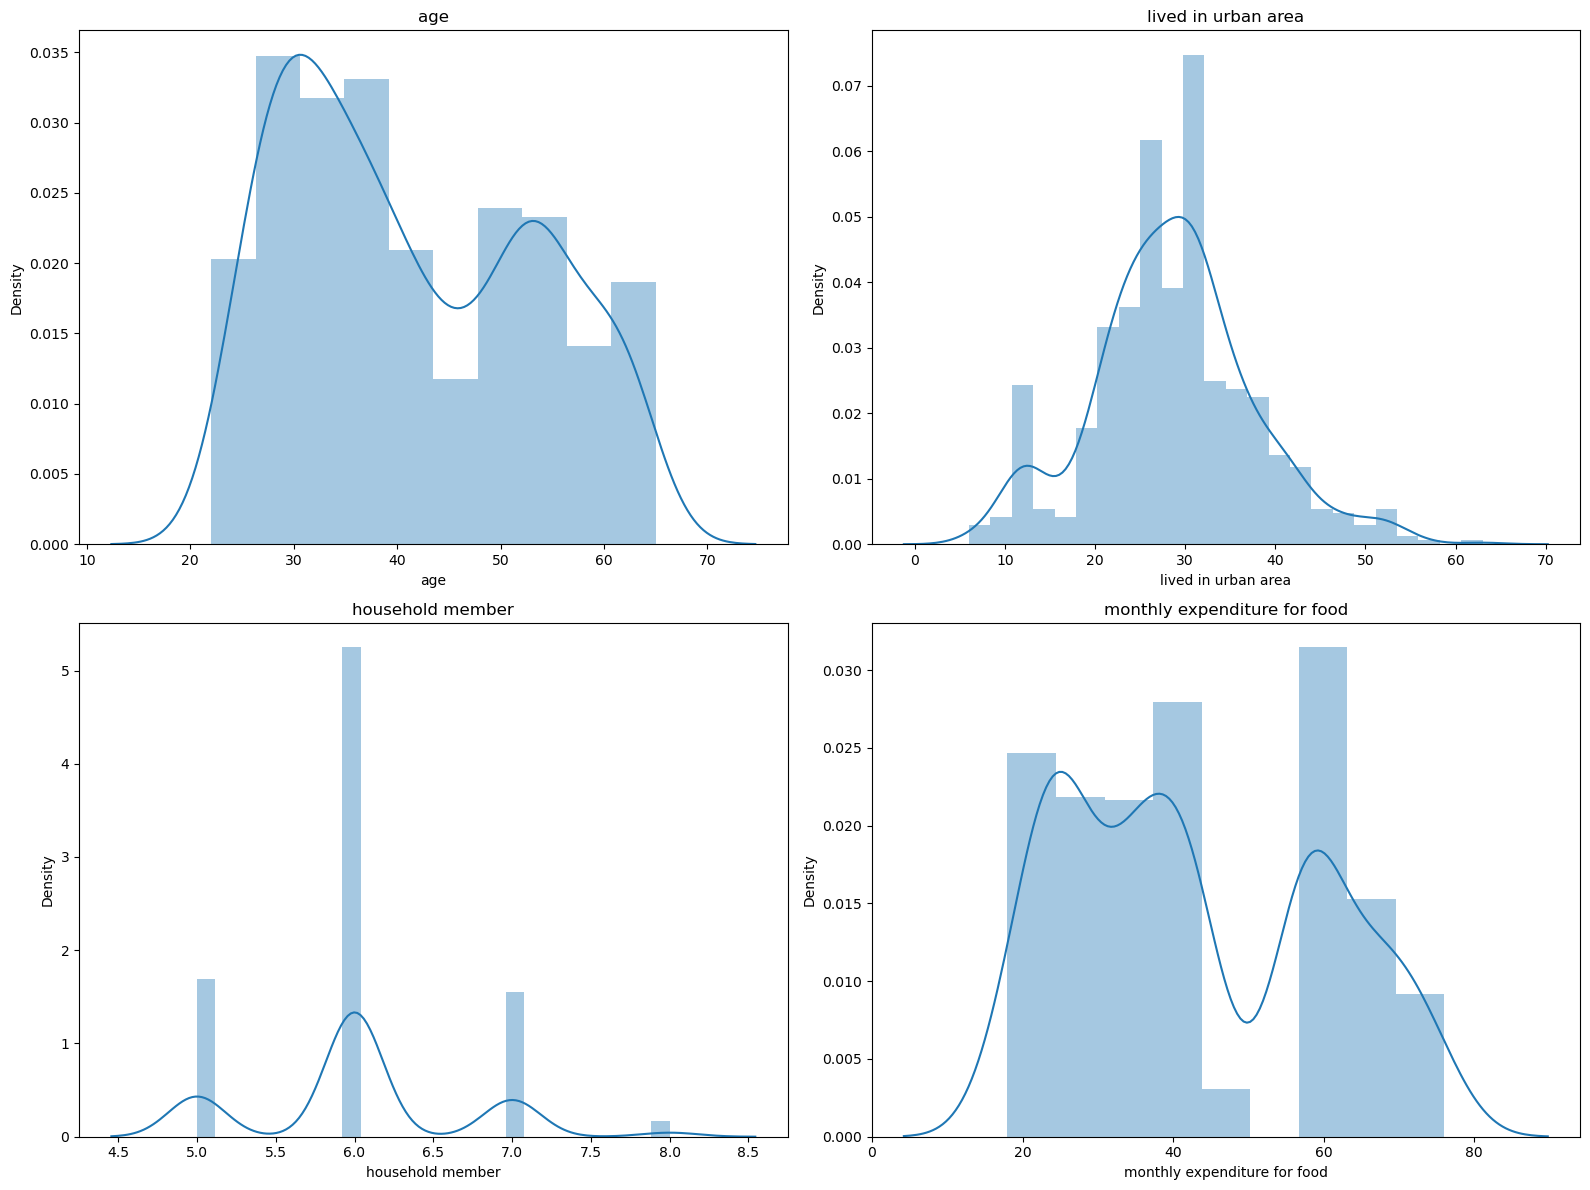

In [41]:
plot_distribution(test, numerical, 2,2)

In [44]:
cat

['city',
 'province',
 'gender',
 'religion',
 'ethnic',
 'education level',
 'occupation',
 'social clas',
 'household income',
 'time of income receipt',
 'household expenditure',
 'health factor',
 'price factor',
 'religious value in type of food',
 'religious value in eating places',
 'religious value in consumption pattern',
 'custom value in type of food',
 'custom value in eating places',
 'custom value in consumption pattern',
 'practice of food consumption based on religious rules',
 'practice of food consumption based on custom rules',
 'buying food product in the right place based on religious rules',
 'type of dishes variation based on religious rules',
 'practice of consuming traditional food']

In [43]:
# print unique values for each column

cat = test.select_dtypes(include=['object']).columns.tolist()
for col in cat:
    print(col, test[col].unique())

city ['Jakarta' 'Bandung' 'Surabaya' 'Makasar' 'Denpasar']
province ['DKI Jakarta' 'West Java' 'East Java' 'South Sulawesi' 'Bali']
gender ['Female' 'Male']
religion ['Islam' 'Protestant' 'Catholic' 'Hindu' 'Budha' 'Other']
ethnic ['Java' 'Other' 'Batak' 'Bugis' 'Sunda' 'Madura' 'Minang' 'Bali']
education level ['Senior High School' 'Bachelor degree' 'Primary School'
 'Master and doctoral degree' 'Diploma' 'Junior High School']
occupation ['Private Employees' 'Government Employees' 'Enterpreneur'
 'Teacher\u200e/Lecturer' 'Police Officer\u200e/Army' 'Independent Worker']
social clas ['Lower Class' 'Middle Class' 'Upper Class']
household income [datetime.time(3, 8) datetime.time(4, 2) datetime.time(5, 8)
 datetime.time(3, 1) datetime.time(3, 4) datetime.time(4, 1)
 datetime.time(13, 0) datetime.time(3, 2) datetime.time(10, 3)
 datetime.time(14, 2) datetime.time(2, 3) datetime.time(5, 9)
 datetime.time(11, 4) datetime.time(3, 0) datetime.time(15, 7)
 datetime.time(13, 2) datetime.time(6,

In [22]:
df.head()

,city,province,gender,age,religion,ethnic,educationlevel,livedinurbanarea,occupation,socialclas,...,religiousvalueineatingplaces,religiousvalueinconsumptionpattern,customvalueintypeoffood,customvalueineatingplaces,customvalueinconsumptionpattern,practiceoffoodconsumptionbasedonreligiousrules,practiceoffoodconsumptionbasedoncustomrules,buyingfoodproductintherightplacebasedonreligiousrules,etypeofdishesvariationbasedonreligiousrules,practiceofconsumingtraditionalfood
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   city                                                   710 non-null    object
 1   province                                               710 non-null    object
 2   gender                                                 710 non-null    object
 3   age                                                    710 non-null    int64 
 4   religion                                               710 non-null    object
 5   ethnic                                                 710 non-null    object
 6   educationlevel                                         710 non-null    object
 7   livedinurbanarea                                       710 non-null    int64 
 8   occupation                                             710 n